Import Libaraies 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import confusion_matrix, classification_report, recall_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import roc_curve, auc
#from imblearn.over_sampling import RandomOverSampler


# Load The dataset 

In [2]:
data = pd.read_csv('Datasets\FinalCreditCard.csv')
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
4996,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
4997,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
4998,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


# Preprocessing Data

Since our dataset is already scaled, except for the amount and time columns, they are left to scale. So, the procedure we will apply in the preprocessing data phase is as follows:
* using RobustScaler to scale time and amount columns because it is not affected by a small number of huge marginal outliers.


In [3]:
# taking the fraud and not fruad data separtely 
fraud = data[data['Class'] == 1]
notfraud = data[data['Class'] == 0]

In [4]:
rob_scaler = RobustScaler()
#Scale Time and Amount coloumns
data['scaled_amount'] = rob_scaler.fit_transform(data['Amount'].values.reshape(-1,1))
data['scaled_time'] = rob_scaler.fit_transform(data['Time'].values.reshape(-1,1))

In [5]:
#Remove the coloumns before, becase we already done scaling
data.drop(['Time','Amount'], axis=1, inplace=True)

scaled_amount = data['scaled_amount']
scaled_time = data['scaled_time']

In [6]:
data.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)

# Put the new columns in suitable order
data.insert(0, 'scaled_amount', scaled_amount)
data.insert(1, 'scaled_time', scaled_time)

In [7]:
#the data after is completely scaled 
fraud = data[data['Class'] == 1]
notfraud = data[data['Class'] == 0]
data.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,2.303559,-0.909889,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.210643,-0.909889,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,6.222793,-0.909450,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.856605,-0.909450,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.940965,-0.909011,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


# Training Phase
As our dataset is clearly unbalanced, we will utilize the StratifiedShuffleSplit() function. This function is used to split the data into train and test sets by their indices. StratifiedShuffleSplit() is a Cross-Validation object that combines two things, which are ShuffleSplit and StratifiedKFold, and it produces Stratified Randomize Folds. Those folds are made by maintaining the percentage of samples for each class.

In [8]:
# to see the percentages of fraud and non fraud (class Distribution)
print('Not Frauds', round(data['Class'].value_counts()[0]/len(data) * 100,2), '% of the dataset')
print('Frauds', round(data['Class'].value_counts()[1]/len(data) * 100,2), '% of the dataset')


Not Frauds 90.16 % of the dataset
Frauds 9.84 % of the dataset


In [9]:
X = data.drop('Class', axis=1)
y = data['Class']
X

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,2.303559,-0.909889,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053
1,-0.210643,-0.909889,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724
2,6.222793,-0.909450,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752
3,1.856605,-0.909450,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458
4,0.940965,-0.909011,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,6.416838,73.348480,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,...,0.391167,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968
4996,-0.243669,73.438481,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,...,0.737657,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637
4997,1.076146,73.440237,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,...,0.266272,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361
4998,3.935661,73.710240,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,...,-0.035480,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700


In [10]:
#to extract 70% of the datasets and Stratified Shuffle Split for balance distribution while training
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)

In [11]:

for train_index, test_index in sss.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    data_Xtrain, data_Xtest = X.iloc[train_index], X.iloc[test_index]
    data_ytrain, data_ytest = y.iloc[train_index], y.iloc[test_index]

Train: [4327 4175  282 ... 1837 1914 3282] Test: [1930 2723 1968 ... 2956 3674 3090]


In [23]:
#to check the distribution of data
train_unique_label, train_counts_label = np.unique(data_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(data_ytest, return_counts=True)
print('-' * 50)

print('Label Distributions: [Fraud Not-Fraud]')
print('Train: {}'.format(train_counts_label/ len(data_ytrain)))
print(train_counts_label)
print('Test: {}'.format(test_counts_label/ len(data_ytest)))
print(test_counts_label)


--------------------------------------------------
Label Distributions: [Fraud Not-Fraud]
Train: [0.90171429 0.09828571]
[3156  344]
Test: [0.90133333 0.09866667]
[1352  148]


In [13]:
import itertools

#to prints and plots the confusion matrix 
#for normilization, it is done by setting normalize=True

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix',cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Building the model phase 
We built a sequential model that used three layers. The first one is the input layer, which uses 32 norouns and ReLU as an activation function. Also, we set the input dimensionality to 29, as we have 29 features in our dataset. Secondly, we only set up one hidden layer that has 16 neurons and ReLU functions. Lastly, the output layer only has 1 neuron because of the binary classification of the class column and Sigmaiod as the output activation function.
However, we used the Adam optimizer, binary_crossentropy is a loss function, and accuracy is a performance matrix to measure the accuracy of each fold of cross validation.

In [14]:

# we used StratifiedShuffleSplit for cross-validation and split it to 7 folds
sss = StratifiedShuffleSplit(n_splits=7, test_size=0.0015, random_state=42)

# we initialize the model
model = Sequential()
model.add(Dense(32, activation='relu', input_dim=30))  
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# we compile the model with adam optimizer and binar
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# we initialize scaler
scaler = RobustScaler()
history_list = []

# we initialize an array to store accuracy scores for each fold
accuracy_scores = []

In [15]:
for train_val_index, test_val_index in sss.split(data_Xtrain, data_ytrain):
    X_train, X_val = data_Xtrain.iloc[train_val_index], data_Xtrain.iloc[test_val_index]
    y_train, y_val = data_ytrain.iloc[train_val_index], data_ytrain.iloc[test_val_index]

    train_val_data = X_train
    train_val_data = train_val_data.assign(Class=y_train)

    fraud_df = train_val_data.loc[train_val_data['Class'] == 1]
    notfraud_df = train_val_data.loc[train_val_data['Class'] == 0].sample(len(fraud_df))
    print('Relation fraud and non-fraud in the CV set:{} x {}'.format(len(fraud_df), len(notfraud_df)))

    print('Test training relationship {} X {}'.format(len(notfraud_df)+len(fraud_df), len(y_val)))
    print('Test training relationship {} X {}'.format((len(notfraud_df)+len(fraud_df))/(len(notfraud_df)+len(fraud_df)+len(y_val)), len(y_val)/(len(notfraud_df)+len(fraud_df)+len(y_val))))
    
    X_train_resampled = pd.concat([fraud_df, notfraud_df]).drop('Class', axis=1)
    y_train_resampled = pd.concat([fraud_df, notfraud_df])['Class']
    

    # to scale the data
    X_train_scaled = scaler.fit_transform(X_train_resampled)
    X_val_scaled = scaler.transform(X_val)
    
    # to fit the model
    early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
    history = model.fit(x=X_train_scaled, y=y_train_resampled, epochs=10, validation_data=(X_val_scaled, y_val),
                        callbacks=[early_stop])

    history_list.append(history.history)
    
    # to evaluate the model
    loss, accuracy = model.evaluate(X_val_scaled, y_val)
    print("Validation Accuracy: {}".format(accuracy))
    accuracy_scores.append(accuracy)

Relation fraud and non-fraud in the CV set:343 x 343
Test training relationship 686 X 6
Test training relationship 0.9913294797687862 X 0.008670520231213872
Epoch 1/10


22/22 [==============================] - 2s 27ms/step - loss: 0.7463 - accuracy: 0.5729 - val_loss: 0.5263 - val_accuracy: 0.8333
Epoch 2/10
22/22 [==============================] - 0s 12ms/step - loss: 0.4849 - accuracy: 0.8309 - val_loss: 0.4118 - val_accuracy: 1.0000
Epoch 3/10
22/22 [==============================] - 0s 12ms/step - loss: 0.3939 - accuracy: 0.8907 - val_loss: 0.3070 - val_accuracy: 1.0000
Epoch 4/10
22/22 [==============================] - 0s 8ms/step - loss: 0.3257 - accuracy: 0.9125 - val_loss: 0.2359 - val_accuracy: 1.0000
Epoch 5/10
22/22 [==============================] - 0s 8ms/step - loss: 0.2700 - accuracy: 0.9344 - val_loss: 0.1717 - val_accuracy: 1.0000
Epoch 6/10
22/22 [==============================] - 0s 7ms/step - loss: 0.2255 - accuracy: 0.9417 - val_loss: 0.1300 - val_accuracy: 1.000

# Evaluation the model
For evaluation, we use the average accuracy of the seven folds. beside that, using the recall that measures the sensitivity of the ROC (area under the ROC curve) and the ROC (receiver operating characteristic curve) itself.

Average Accuracy Neural Network: 1.0
47/47 [==============================] - 0s 3ms/step

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1352
           1       0.97      0.97      0.97       148

    accuracy                           0.99      1500
   macro avg       0.99      0.99      0.99      1500
weighted avg       0.99      0.99      0.99      1500

Recall:  0.972972972972973


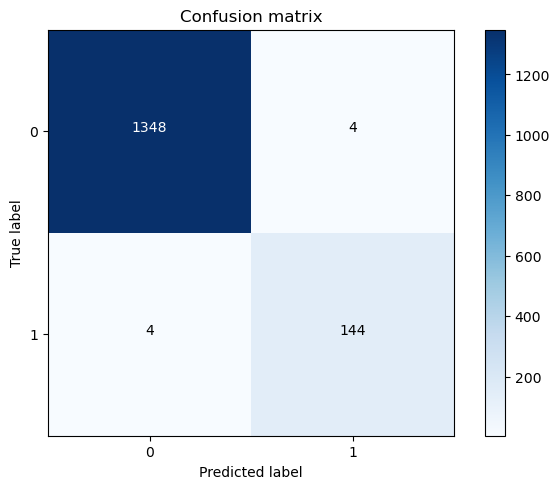

In [16]:
# to print the average accuracy across all folds
print("Average Accuracy Neural Network: {}".format(np.mean(accuracy_scores)))

# to evaluate the model on the test set
X_test_scaled = scaler.transform(data_Xtest)
y_pred_prob = model.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int)

# to generate the confusion matrix
conf_matrix = confusion_matrix(data_ytest, y_pred)

# to print the classification report
print("\nClassification Report:\n", classification_report(data_ytest, y_pred))
print("Recall: ", recall_score(data_ytest, y_pred))

# to plot non-normalized confusion matrix
class_names = [0, 1]
plt.figure()
plot_confusion_matrix(conf_matrix, classes=class_names, title='Confusion matrix')
plt.show()

47/47 [==============================] - 0s 2ms/step


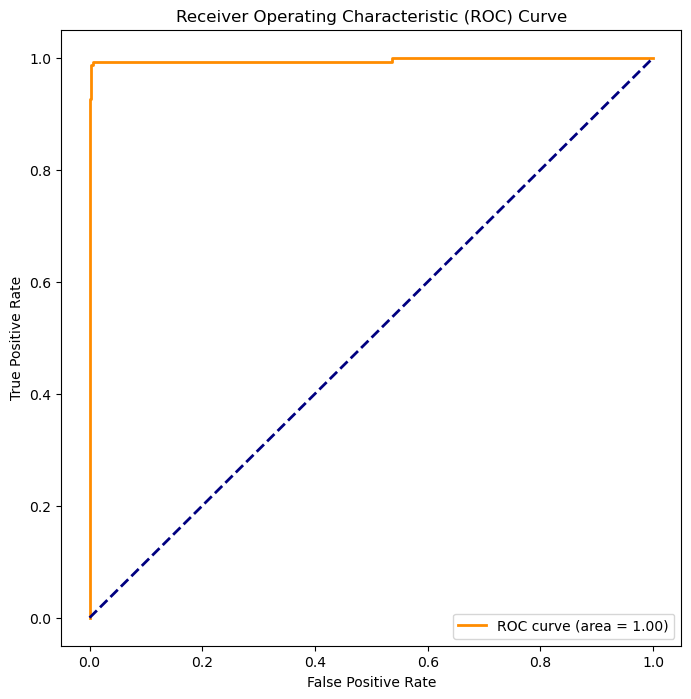

In [17]:

y_pred_prob = model.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int)


# to Plot ROC curve
fpr, tpr, _ = roc_curve(data_ytest, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# to find the minimum length of histories
min_length = min(len(history['loss']) for history in history_list)

In [18]:
# to truncate or pad histories to have the same length
truncated_histories = []
for history in history_list:
    truncated_history = {
        'loss': history['loss'][:min_length],
        'val_loss': history['val_loss'][:min_length],
        'accuracy': history['accuracy'][:min_length],
        'val_accuracy': history['val_accuracy'][:min_length]
    }
    truncated_histories.append(truncated_history)

In [19]:
# to calculate mean values for each epoch
mean_loss = np.mean([history['loss'] for history in truncated_histories], axis=0)
mean_val_loss = np.mean([history['val_loss'] for history in truncated_histories], axis=0)
mean_accuracy = np.mean([history['accuracy'] for history in truncated_histories], axis=0)
mean_val_accuracy = np.mean([history['val_accuracy'] for history in truncated_histories], axis=0)

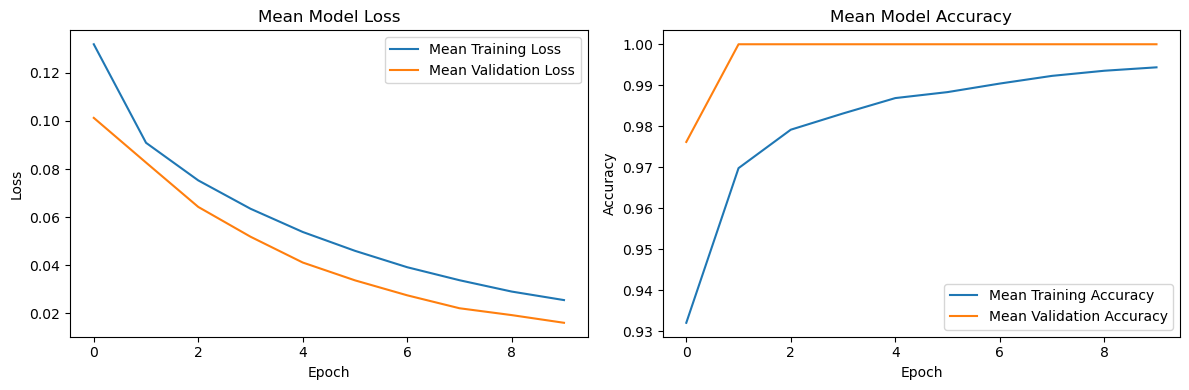

In [20]:
# to plot mean training/validation loss and accuracy
plt.figure(figsize=(12, 4))

# to lot Mean Loss
plt.subplot(1, 2, 1)
plt.plot(mean_loss, label='Mean Training Loss')
plt.plot(mean_val_loss, label='Mean Validation Loss')
plt.title('Mean Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot Mean Accuracy
plt.subplot(1, 2, 2)
plt.plot(mean_accuracy, label='Mean Training Accuracy')
plt.plot(mean_val_accuracy, label='Mean Validation Accuracy')
plt.title('Mean Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                992       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
